In [19]:
import pandas as pd             
import matplotlib.pyplot as plt  
import datetime as dt           
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import math
import os                       
import requests, io              
import zipfile as zf             
import shutil                   
import statsmodels.formula.api as smf
%matplotlib inline

In [20]:
path_us_counties = '/Users/yuanhuang/Desktop/databootcamp_final_project/us-counties.csv'
us_counties = pd.read_csv(path_us_counties)
us_counties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
748497,2020-11-19,Sweetwater,Wyoming,56037.0,1269,6
748498,2020-11-19,Teton,Wyoming,56039.0,1298,2
748499,2020-11-19,Uinta,Wyoming,56041.0,869,4
748500,2020-11-19,Washakie,Wyoming,56043.0,273,7


In [21]:
state_level = pd.DataFrame(us_counties.groupby(['date','state'])['deaths'].sum())
state_level = state_level.reset_index('state')
state_level = state_level.reset_index('date')
state_level = state_level.sort_values(by=['date','state'])
state_level = state_level.set_index('date')
state_level

,state,deaths
date,,
2020-01-21,Washington,0
2020-01-22,Washington,0
2020-01-23,Washington,0
2020-01-24,Illinois,0
2020-01-24,Washington,0
...,...,...
2020-11-19,Virginia,3896
2020-11-19,Washington,2717
2020-11-19,West Virginia,623


In [22]:
state = pd.Series(state_level['state'].unique())

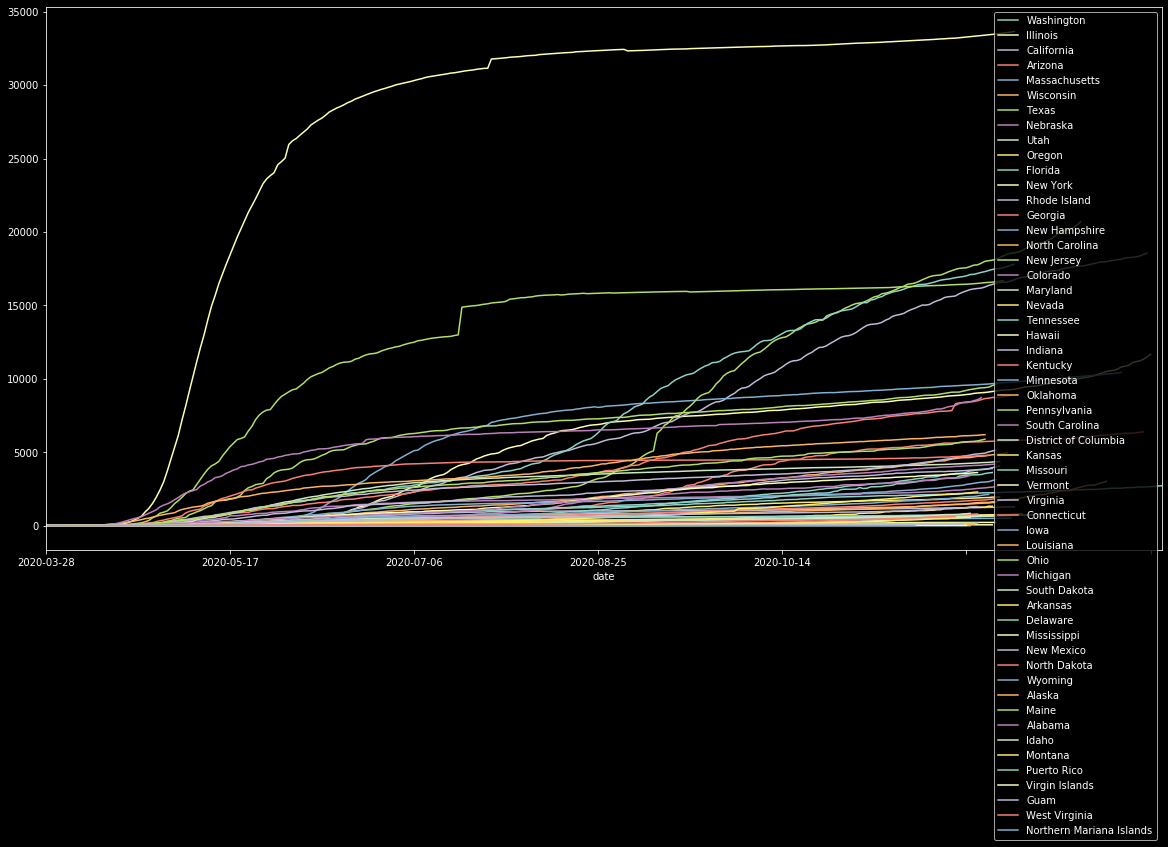

In [38]:
fig,ax = plt.subplots()
for i in state:
    state_level.loc[state_level['state'] == i,:]['deaths'].plot(ax =ax,figsize = (20,10),label=i)
    ax.legend(loc='best')
#ax.legend()
#state_level['deaths'].mean().plot(ax =ax,figsize = (10,5))
#state_level['death'].plot(ax =ax,figsize = (10,5))
#plt.plot(state_level['date'],state_level['deaths'],label=state_level['state'])
#plot(state_level['death'], label=state_level['state'])

In [24]:
state_level.iloc[:,1]

date
2020-01-21       0
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-24       0
              ... 
2020-11-19    3896
2020-11-19    2717
2020-11-19     623
2020-11-19    3021
2020-11-19     176
Name: deaths, Length: 14424, dtype: int64

In [25]:
state_level_pivot = pd.pivot_table(state_level,index=['date'],columns=['state'],
               values=['deaths'],fill_value=np.nan)
state_level_pivot = state_level_pivot.dropna()
state_level_pivot

deaths                                                          \
state      Alabama Alaska Arizona Arkansas California Colorado Connecticut   
date                                                                         
2020-03-28     4.0    1.0    15.0      5.0      122.0     44.0        33.0   
2020-03-29     5.0    2.0    18.0      6.0      132.0     47.0        34.0   
2020-03-30    11.0    2.0    20.0      7.0      147.0     51.0        36.0   
2020-03-31    14.0    2.0    24.0      8.0      184.0     69.0        69.0   
2020-04-01    28.0    2.0    29.0     10.0      212.0     80.0        85.0   
...            ...    ...     ...      ...        ...      ...         ...   
2020-11-15  3248.0   92.0  6302.0   2183.0    18265.0   2574.0      4737.0   
2020-11-16  3249.0   92.0  6302.0   2225.0    18304.0   2605.0      4759.0   
2020-11-17  3301.0   94.0  6320.0   2245.0    18360.0   2626.0      4771.0   
2020-11-18  3347.0   94.0  6365.0   2275.0    18467.0   2669.0      4784.0   
2020-11-19  3419.0   95.0  6384.0   2297.0    18555.0   2734.0      4805.0   

                                                   ...                     \
state      Delaware District of Columbia  Florida  ... Tennessee    Texas   
date                                               ...                      
2020-03-28      5.0                  4.0     56.0  ...       6.0     30.0   
2020-03-29      6.0                  5.0     60.0  ...       7.0     35.0   
2020-03-30      7.0                  9.0     72.0  ...      13.0     46.0   
2020-03-31     10.0                  9.0     85.0  ...      13.0     57.0   
2020-04-01     11.0                 11.0    100.0  ...      23.0     65.0   
...             ...                  ...      ...  ...       ...      ...   
2020-11-15    736.0                660.0  17517.0  ...    3856.0  20110.0   
2020-11-16    736.0                660.0  17558.0  ...    3884.0  20157.0   
2020-11-17    739.0                660.0  17643.0  ...    3953.0  20278.0   
2020-11-18    742.0                665.0  17730.0  ...    4005.0  20471.0   
2020-11-19    742.0                667.0  17809.0  ...    4082.0  20689.0   

                                                                            \
state        Utah Vermont Virgin Islands Virginia Washington West Virginia   
date                                                                         
2020-03-28    2.0    12.0            0.0      9.0        193           0.0   
2020-03-29    2.0    12.0            0.0     11.0        209           1.0   
2020-03-30    4.0    12.0            0.0     12.0        221           1.0   
2020-03-31    5.0    13.0            0.0     12.0        226           1.0   
2020-04-01    7.0    16.0            0.0     18.0        250           2.0   
...           ...     ...            ...      ...        ...           ...   
2020-11-15  718.0    59.0           23.0   3800.0       2638         582.0   
2020-11-16  725.0    59.0           23.0   3806.0       2661         585.0   
2020-11-17  734.0    59.0           23.0   3835.0       2686         598.0   
2020-11-18  742.0    60.0           23.0   3860.0       2704         612.0   
2020-11-19  758.0    61.0           23.0   3896.0       2717         623.0   

                              
state      Wisconsin Wyoming  
date                          
2020-03-28      17.0     0.0  
2020-03-29      17.0     0.0  
2020-03-30      20.0     0.0  
2020-03-31      25.0     0.0  
2020-04-01      33.0     0.0  
...              ...     ...  
2020-11-15    2759.0   144.0  
2020-11-16    2775.0   144.0  
2020-11-17    2876.0   155.0  
2020-11-18    2939.0   155.0  
2020-11-19    3021.0   176.0  

[237 rows x 55 columns]

In [26]:
for i in range(0,55):
    state_level_pivot['death_'+str(i)] = state_level_pivot.iloc[:,i].rolling(window=7).mean()

state_level_pivot

deaths                                                          \
state      Alabama Alaska Arizona Arkansas California Colorado Connecticut   
date                                                                         
2020-03-28     4.0    1.0    15.0      5.0      122.0     44.0        33.0   
2020-03-29     5.0    2.0    18.0      6.0      132.0     47.0        34.0   
2020-03-30    11.0    2.0    20.0      7.0      147.0     51.0        36.0   
2020-03-31    14.0    2.0    24.0      8.0      184.0     69.0        69.0   
2020-04-01    28.0    2.0    29.0     10.0      212.0     80.0        85.0   
...            ...    ...     ...      ...        ...      ...         ...   
2020-11-15  3248.0   92.0  6302.0   2183.0    18265.0   2574.0      4737.0   
2020-11-16  3249.0   92.0  6302.0   2225.0    18304.0   2605.0      4759.0   
2020-11-17  3301.0   94.0  6320.0   2245.0    18360.0   2626.0      4771.0   
2020-11-18  3347.0   94.0  6365.0   2275.0    18467.0   2669.0      4784.0   
2020-11-19  3419.0   95.0  6384.0   2297.0    18555.0   2734.0      4805.0   

                                                   ...     death_45  \
state      Delaware District of Columbia  Florida  ...                
date                                               ...                
2020-03-28      5.0                  4.0     56.0  ...          NaN   
2020-03-29      6.0                  5.0     60.0  ...          NaN   
2020-03-30      7.0                  9.0     72.0  ...          NaN   
2020-03-31     10.0                  9.0     85.0  ...          NaN   
2020-04-01     11.0                 11.0    100.0  ...          NaN   
...             ...                  ...      ...  ...          ...   
2020-11-15    736.0                660.0  17517.0  ...  3743.285714   
2020-11-16    736.0                660.0  17558.0  ...  3787.142857   
2020-11-17    739.0                660.0  17643.0  ...  3832.000000   
2020-11-18    742.0                665.0  17730.0  ...  3871.714286   
2020-11-19    742.0                667.0  17809.0  ...  3919.000000   

                death_46    death_47   death_48 death_49     death_50  \
state                                                                   
date                                                                    
2020-03-28           NaN         NaN        NaN      NaN          NaN   
2020-03-29           NaN         NaN        NaN      NaN          NaN   
2020-03-30           NaN         NaN        NaN      NaN          NaN   
2020-03-31           NaN         NaN        NaN      NaN          NaN   
2020-04-01           NaN         NaN        NaN      NaN          NaN   
...                  ...         ...        ...      ...          ...   
2020-11-15  19718.857143  690.428571  59.000000     23.0  3760.285714   
2020-11-16  19841.571429  699.571429  59.000000     23.0  3773.571429   
2020-11-17  19963.714286  708.428571  59.000000     23.0  3789.142857   
2020-11-18  20096.142857  717.571429  59.142857     23.0  3806.142857   
2020-11-19  20236.714286  727.428571  59.428571     23.0  3825.857143   

               death_51    death_52     death_53    death_54  
state                                                         
date                                                          
2020-03-28          NaN         NaN          NaN         NaN  
2020-03-29          NaN         NaN          NaN         NaN  
2020-03-30          NaN         NaN          NaN         NaN  
2020-03-31          NaN         NaN          NaN         NaN  
2020-04-01          NaN         NaN          NaN         NaN  
...                 ...         ...          ...         ...  
2020-11-15  2613.571429  557.857143  2615.285714  130.000000  
2020-11-16  2625.571429  565.714286  2665.857143  134.285714  
2020-11-17  2638.714286  573.142857  2720.000000  138.285714  
2020-11-18  2654.285714  581.571429  2773.857143  142.285714  
2020-11-19  2668.285714  591.285714  2830.285714  149.285714  

[237 rows x 110 co

In [ ]:
import datetime
df2_2 = state_level.reset_index('date')
df2_2['Date'] = pd.to_datetime(df2_2['date'])
df2_2['Date'] = df2_2['Date'].dt.strftime('%d.%m.%Y')
df2_2['month'] = pd.DatetimeIndex(df2_2['Date']).month
df2_2['day'] = pd.DatetimeIndex(df2_2['Date']).day
df2_2['dayofyear'] = pd.DatetimeIndex(df2_2['Date']).dayofyear
df2_2['weekofyear'] = pd.DatetimeIndex(df2_2['Date']).weekofyear
df2_2['weekday'] = pd.DatetimeIndex(df2_2['Date']).weekday
df2_2['quarter'] = pd.DatetimeIndex(df2_2['Date']).quarter
df2_2['is_month_start'] = pd.DatetimeIndex(df2_2['Date']).is_month_start
df2_2['is_month_end'] = pd.DatetimeIndex(df2_2['Date']).is_month_end
df2_2 = df2_2.drop(['Date'], axis = 1)
df2_2 = df2_2.drop(['date'], axis = 1)
df2_2= pd.get_dummies(df2_2, columns=['month'], drop_first=True, prefix='month')
df2_2 = pd.get_dummies(df2_2, columns=['weekday'], drop_first=True, prefix='wday')
df2_2 = pd.get_dummies(df2_2, columns=['quarter'], drop_first=True, prefix='qrtr')
df2_2= pd.get_dummies(df2_2, columns=['is_month_start'], drop_first=True, prefix='m_start')
df2_2 = pd.get_dummies(df2_2, columns=['is_month_end'], drop_first=True, prefix='m_end')
df2_2= pd.get_dummies(df2_2, columns=['state'], drop_first=True, prefix='state')
df2_2
df2_2


In [ ]:
from sklearn.model_selection import train_test_split

X = df2_2.drop(columns=["deaths"]).values
y = df2_2.deaths.values
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, shuffle=False, test_size=0.5, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, shuffle=False, test_size=0.5, random_state = 0)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

y_predicted    = model_1.predict(X_val)
MAE_sklearn = mean_absolute_error(y_val, y_predicted)
yy = model_1.predict(X_train)
MAE_sklearn_train = mean_absolute_error(y_train, yy)

In [28]:
MAE_sklearn

NameError: name 'MAE_sklearn' is not defined

In [29]:
us_level = pd.DataFrame(state_level.groupby('date')['deaths'].sum())
us_level

,deaths
date,
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
...,...
2020-11-15,245148
2020-11-16,245937
2020-11-17,247535


In [31]:
path_netflix = '/Users/yuanhuang/Desktop/databootcamp_final_project/Netflix.csv'
netflix = pd.read_csv(path_netflix).tail(365)
netflix['Date'] = pd.to_datetime(netflix['Date'])
netflix = netflix[netflix['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
#pd.set_option('display.max_rows', None)
netflix = netflix.set_index('Date')
netflix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,326.100006,329.980011,324.779999,329.809998,329.809998,4485800
2020-01-03,326.779999,329.859985,325.529999,325.899994,325.899994,3806900
2020-01-06,323.119995,336.359985,321.200012,335.829987,335.829987,5663100
2020-01-07,336.470001,336.700012,330.299988,330.750000,330.750000,4703200
2020-01-08,331.489990,342.700012,331.049988,339.260010,339.260010,7104500
...,...,...,...,...,...,...
2020-07-28,496.019989,497.790009,487.760010,488.510010,488.510010,5986700
2020-07-29,492.250000,494.920013,484.130005,484.480011,484.480011,6611800
2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600


In [32]:
netflix_sub = netflix.iloc[:,3:4]
netflix_sub 

,Close
Date,
2020-01-02,329.809998
2020-01-03,325.899994
2020-01-06,335.829987
2020-01-07,330.750000
2020-01-08,339.260010
...,...
2020-07-28,488.510010
2020-07-29,484.480011
2020-07-30,485.799988


In [114]:
path_amazon = '/Users/yuanhuang/Desktop/databootcamp_final_project/Amazon.csv'
amazon = pd.read_csv(path_amazon).tail(365)
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon[amazon['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
amazon = amazon.set_index('Date')

In [116]:
amazon_sub = amazon.iloc[:,3:4]
amazon_sub 

,Close
Date,
2020-01-02,1898.010010
2020-01-03,1874.969971
2020-01-06,1902.880005
2020-01-07,1906.859985
2020-01-08,1891.969971
...,...
2020-08-10,3148.159912
2020-08-11,3080.669922
2020-08-12,3162.239990


In [117]:
amazon_sub1 = amazon_sub.reset_index('Date')
amazon_sub1

,Date,Close
0,2020-01-02,1898.010010
1,2020-01-03,1874.969971
2,2020-01-06,1902.880005
3,2020-01-07,1906.859985
4,2020-01-08,1891.969971
...,...,...
152,2020-08-10,3148.159912
153,2020-08-11,3080.669922
154,2020-08-12,3162.239990
155,2020-08-13,3161.020020


In [98]:
path_google = '/Users/yuanhuang/Desktop/databootcamp_final_project/Google.csv'
google = pd.read_csv(path_google).tail(365)
google['Date'] = pd.to_datetime(google['Date'])
google = google[google['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
google = google.set_index('Date')
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
...,...,...,...,...,...,...
2020-08-31,1643.569946,1644.500000,1625.329956,1629.530029,1629.530029,1321100
2020-09-01,1632.160034,1659.219971,1629.530029,1655.079956,1655.079956,1133800
2020-09-02,1668.010010,1726.099976,1660.189941,1717.390015,1717.390015,2476100


In [103]:
google_sub = google.iloc[:,3:4]
google_sub 

,Close
Date,
2020-01-02,1368.680054
2020-01-03,1361.520020
2020-01-06,1397.810059
2020-01-07,1395.109985
2020-01-08,1405.040039
...,...
2020-08-31,1629.530029
2020-09-01,1655.079956
2020-09-02,1717.390015


In [104]:
google_sub1 = google_sub.reset_index('Date')
google_sub1

,Date,Close
0,2020-01-02,1368.680054
1,2020-01-03,1361.520020
2,2020-01-06,1397.810059
3,2020-01-07,1395.109985
4,2020-01-08,1405.040039
...,...,...
167,2020-08-31,1629.530029
168,2020-09-01,1655.079956
169,2020-09-02,1717.390015
170,2020-09-03,1629.510010


In [105]:
path_apple = '/Users/yuanhuang/Desktop/databootcamp_final_project/Apple.csv'
apple = pd.read_csv(path_apple).tail(365)
apple['Date'] = pd.to_datetime(apple['Date'])
apple = apple[apple['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
apple = apple.set_index('Date')
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.278160,132079200.0
...,...,...,...,...,...,...
2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0
2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0
2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0


In [107]:
apple_sub = apple.iloc[:,3:4]
apple_sub1 = apple_sub.reset_index('Date')
apple_sub1

,Date,Close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501
...,...,...
164,2020-08-26,126.522499
165,2020-08-27,125.010002
166,2020-08-28,124.807503
167,2020-08-31,129.039993


In [108]:
path_facebook = '/Users/yuanhuang/Desktop/databootcamp_final_project/Facebook.csv'
facebook = pd.read_csv(path_facebook).tail(365)
facebook = facebook
facebook['Date'] = pd.to_datetime(facebook['Date'])
facebook = facebook[facebook['Date'].dt.year == 2020]
#pd.reset_option('display.max_rows', None)
facebook = facebook.set_index('Date')
facebook

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000
...,...,...,...,...,...,...
2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000
2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700


In [112]:
facebook_sub = facebook.iloc[:,3:4]
facebook_sub1 = facebook_sub.reset_index('Date')
facebook_sub1

,Date,Close
0,2020-01-02,209.779999
1,2020-01-03,208.669998
2,2020-01-06,212.600006
3,2020-01-07,213.059998
4,2020-01-08,215.220001
...,...,...
154,2020-08-12,259.890015
155,2020-08-13,261.299988
156,2020-08-14,261.239990
157,2020-08-17,261.160004


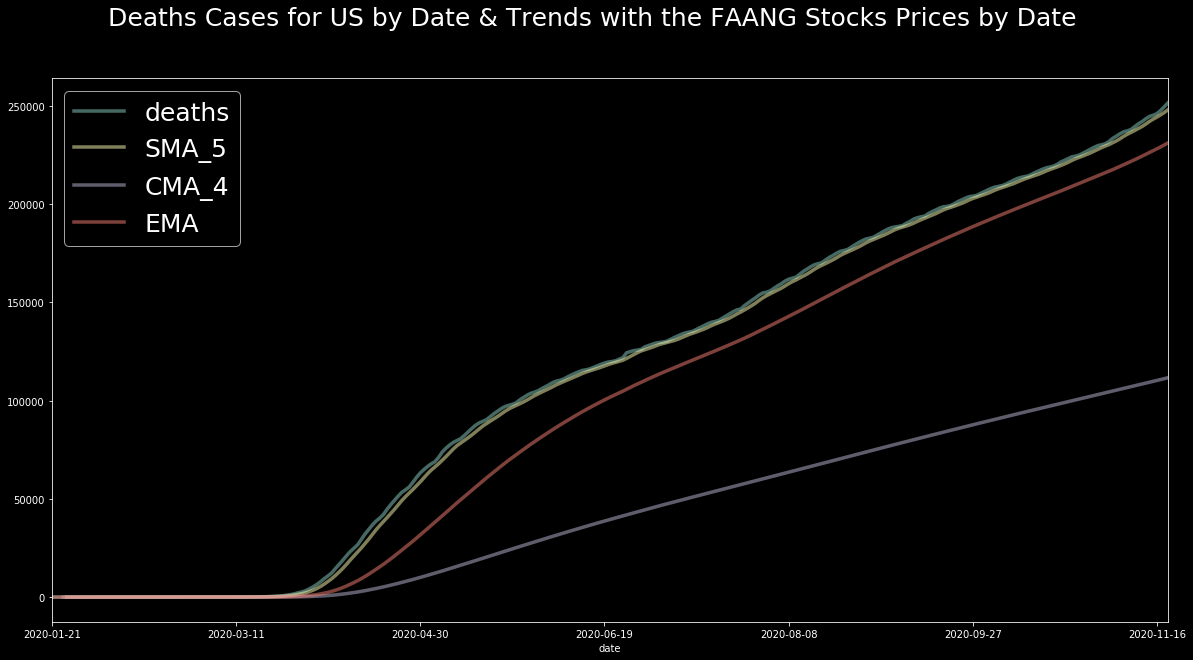

In [139]:
fig, ax1 = plt.subplots()
fig.suptitle('Deaths Cases for US by Date & Trends with the FAANG Stocks Prices by Date',fontsize=25)
us_level['deaths'].plot(ax =ax1,figsize = (20,10),lw=3.5,alpha = 0.5)
#us_level['SMA_3'] = us_level.iloc[:,0].rolling(window=3).mean()
#us_level['SMA_4'] = us_level.iloc[:,0].rolling(window=4).mean()
us_level['SMA_5'] = us_level.iloc[:,0].rolling(window=5).mean()
us_level['CMA_5'] = us_level.iloc[:,0].expanding(min_periods=5).mean()
us_level['EMA'] = us_level.iloc[:,0].ewm(span=40,adjust=False).mean()
#us_level['SMA_3'].plot(ax=ax,lw=4)
#us_level['SMA_4'].plot(ax=ax)
us_level['SMA_5'].plot(ax=ax1,alpha = 0.5,lw=3.5)
us_level['CMA_4'].plot(ax=ax1,alpha = 0.5,lw=3.5)
us_level['EMA'].plot(ax=ax1,alpha = 0.5,lw=3.5)
ax1.legend(fontsize=25)
plt.savefig('COVID19.png')

In [55]:
netflix_sub

,Close
Date,
2020-01-02,329.809998
2020-01-03,325.899994
2020-01-06,335.829987
2020-01-07,330.750000
2020-01-08,339.260010
...,...
2020-07-28,488.510010
2020-07-29,484.480011
2020-07-30,485.799988


In [111]:
netflix_sub1 = netflix_sub.reset_index('Date')
netflix_sub1

,Date,Close
0,2020-01-02,329.809998
1,2020-01-03,325.899994
2,2020-01-06,335.829987
3,2020-01-07,330.750000
4,2020-01-08,339.260010
...,...,...
143,2020-07-28,488.510010
144,2020-07-29,484.480011
145,2020-07-30,485.799988
146,2020-07-31,488.880005


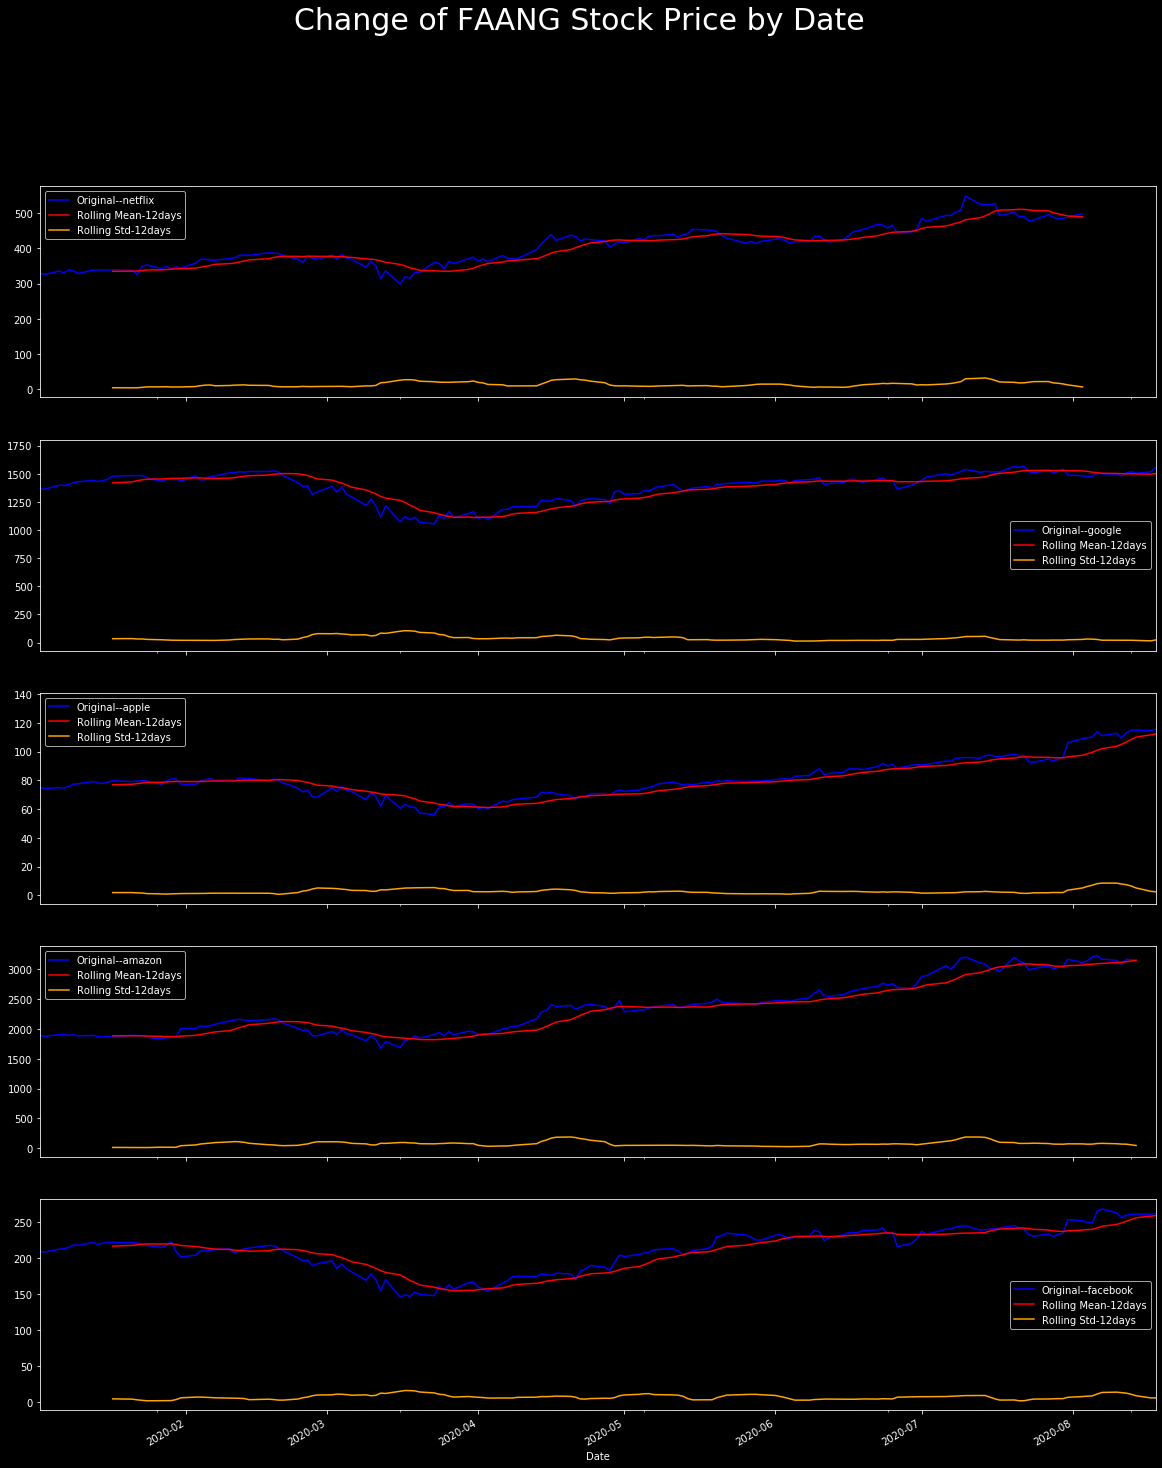

In [129]:
fig,ax = plt.subplots(5,figsize=(20,25),sharex=True)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,i,name):
    
    #Determing rolling statistics
    timeseries['rolmean'] = timeseries.iloc[:,1:2].rolling(window=12).mean()
    timeseries['rolstd']= timeseries.iloc[:,1:2].rolling(window=12).std()

    #Plot rolling statistics:
    plt.style.use('dark_background')
    timeseries.plot(x='Date',y='Close',color='blue',label='Original'+'--'+str(name),ax=ax[i])
    timeseries.plot(x='Date',y='rolmean',color='red', label='Rolling Mean-12days',ax=ax[i])
    timeseries.plot(x='Date',y='rolstd',color='orange', label = 'Rolling Std-12days',ax=ax[i])
    ax[i].legend(loc='best')
    #ax[i].show(block=False)  
    
#ax[0].title('Rolling Mean & Standard Deviation - Netflix') 
fig.suptitle('Change of FAANG Stock Price by Date',fontsize = 30)
test_stationarity(netflix_sub1,0,'netflix')
test_stationarity(google_sub1,1,'google')
test_stationarity(apple_sub1,2,'apple')
test_stationarity(amazon_sub1,3,'amazon')
test_stationarity(facebook_sub1,4,'facebook')
plt.savefig('FAANG1.png')